# Bagging Machine Learning Algorithm

### **B**ootstrap **Agg**regat**ing** or [Bagging](https://en.wikipedia.org/wiki/Bootstrap_aggregating)
* [Scikit- Learn Reference](http://scikit-learn.org/stable/modules/ensemble.html#bagging)
* Bootstrap sampling: Sampling with replacement
* Combine by averaging the output (regression)
* Combine by voting (classification)
* Can be applied to many classifiers which includes ANN, CART, etc.

# Importing Titanic Dataset

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot
#matplotlib inline
import pandas as pd

In [2]:
df = sns.load_dataset("titanic")

In [3]:
df.shape

(891, 15)

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.dropna(inplace=True)       # removing rows with missing values

In [6]:
df.pclass.unique()

array([1, 3, 2], dtype=int64)

In [7]:
df.pclass.value_counts()

pclass
1    157
2     15
3     10
Name: count, dtype: int64

In [8]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [9]:
df.sex.value_counts()

sex
male      94
female    88
Name: count, dtype: int64

<Axes: >

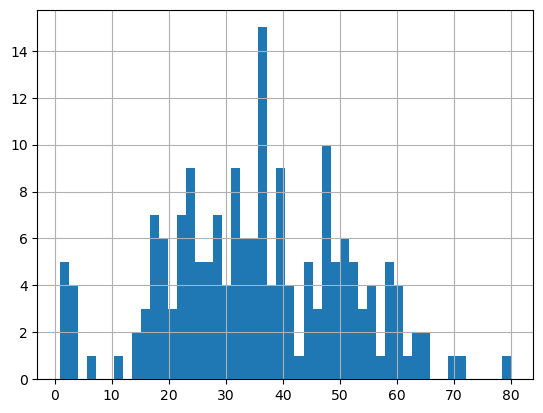

In [10]:
df.age.hist(bins=50)

# Data Pre-Processing

In [11]:
X = df[["pclass", "sex", "age"]]

In [12]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

In [13]:
X["sex"] = lb.fit_transform(X['sex'])

C:\Users\jatin\AppData\Local\Temp\ipykernel_12296\696653722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["sex"] = lb.fit_transform(X['sex'])


In [14]:
X.head()

,pclass,sex,age
1,1,0,38.0
3,1,0,35.0
6,1,1,54.0
10,3,0,4.0
11,1,0,58.0


In [15]:
X.shape

(182, 3)

In [16]:
X.describe()

,pclass,sex,age
count,182.000000,182.000000,182.000000
mean,1.192308,0.516484,35.623187
std,0.516411,0.501107,15.671615
min,1.000000,0.000000,0.920000
25%,1.000000,0.000000,24.000000
50%,1.000000,1.000000,36.000000
75%,1.000000,1.000000,47.750000
max,3.000000,1.000000,80.000000


In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 1 to 889
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  182 non-null    int64  
 1   sex     182 non-null    int32  
 2   age     182 non-null    float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 5.0 KB


In [18]:
y=df["survived"]

In [19]:
y.value_counts()

survived
1    123
0     59
Name: count, dtype: int64

# Boosting (Hypothesis Boosting)


* Combine several weak learners into a strong learner. 

* Train predictors sequentially

### AdaBoost / Adaptive Boosting

[Scikit Learn AdaBoost](http://scikit-learn.org/stable/modules/ensemble.html#adaboost)

1995

As above for Boosting:
* Similar to human learning, the algo learns from past mistakes by focusing more on difficult problems it did not get right in prior learning. 
* In machine learning speak, it pays more attention to training instances that previously underfitted.

Source: Scikit-Learn:

* Fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. 
* The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction.
* The data modifications at each so-called boosting iteration consist of applying weights $w_1, w_2, …, w_N$ to each of the training samples. 
* Initially, those weights are all set to $w_i = 1/N$, so that the first step simply trains a weak learner on the original data. 
* For each successive iteration, the sample weights are individually modified and the learning algorithm is reapplied to the reweighted data. 
* At a given step, those training examples that were incorrectly predicted by the boosted model induced at the previous step have their weights increased, whereas the weights are decreased for those that were predicted correctly. 
* As iterations proceed, examples that are difficult to predict receive ever-increasing influence. Each subsequent weak learner is thereby forced to concentrate on the examples that are missed by the previous ones in the sequence.



In [26]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [28]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:    
        print("Train Results:\n")
        print(f"Accuracy score: {accuracy_score(y_train, clf.predict(X_train))}\n")
        print(f"Classification Report:\n{classification_report(y_train, clf.predict(X_train))}\n")
        print(f"Confusion Matrix:\n {confusion_matrix(y_train, clf.predict(X_train))}\n")

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring="accuracy")
        print(f"Average Accuracy \t {np.mean(res)}")
        print(f"Accuracy SD: \t\t {np.std(res)}")

    elif train==False:
        print("Test Results:\n")
        print(f"Accuracy score: {accuracy_score(y_test, clf.predict(X_test))}\n")
        print(f"Classification Report: \n {classification_report(y_test, clf.predict(X_test))}\n")
        print(f"Confusion Matrix: \n{confusion_matrix(y_test, clf.predict(X_test))}\n")

In [30]:
ada_clf = AdaBoostClassifier()

In [31]:
ada_clf.fit(X_train, y_train)

C:\Users\jatin\anaconda3\envs\iris_2\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [32]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=True)

Train Results:

Accuracy score: 0.8661417322834646

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.90      0.91      0.90        86

    accuracy                           0.87       127
   macro avg       0.85      0.84      0.85       127
weighted avg       0.87      0.87      0.87       127


Confusion Matrix:
 [[32  9]
 [ 8 78]]



C:\Users\jatin\anaconda3\envs\iris_2\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\jatin\anaconda3\envs\iris_2\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\jatin\anaconda3\envs\iris_2\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\jatin\anaconda3\envs\iris_2\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circum

Average Accuracy 	 0.7416666666666667
Accuracy SD: 		 0.05529566099539656


C:\Users\jatin\anaconda3\envs\iris_2\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [33]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

Test Results:

Accuracy score: 0.6727272727272727

Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.33      0.40        18
           1       0.72      0.84      0.78        37

    accuracy                           0.67        55
   macro avg       0.61      0.59      0.59        55
weighted avg       0.65      0.67      0.65        55


Confusion Matrix: 
[[ 6 12]
 [ 6 31]]



# AdaBoost with Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
ada_rf_clf = AdaBoostClassifier(RandomForestClassifier())

In [41]:
ada_rf_clf.fit(X_train, y_train)

C:\Users\jatin\anaconda3\envs\iris_2\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=RandomForestClassifier())

In [42]:
print_score(ada_rf_clf, X_train, y_train, X_test, y_test, train=True)

Train Results:

Accuracy score: 0.9448818897637795

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91        41
           1       0.95      0.97      0.96        86

    accuracy                           0.94       127
   macro avg       0.94      0.93      0.94       127
weighted avg       0.94      0.94      0.94       127


Confusion Matrix:
 [[37  4]
 [ 3 83]]



C:\Users\jatin\anaconda3\envs\iris_2\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\jatin\anaconda3\envs\iris_2\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\jatin\anaconda3\envs\iris_2\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\jatin\anaconda3\envs\iris_2\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circum

Average Accuracy 	 0.8038461538461539
Accuracy SD: 		 0.07846740383640696


In [43]:
print_score(ada_rf_clf, X_train, y_train, X_test, y_test, train=False)

Test Results:

Accuracy score: 0.7454545454545455

Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.50      0.56        18
           1       0.78      0.86      0.82        37

    accuracy                           0.75        55
   macro avg       0.71      0.68      0.69        55
weighted avg       0.74      0.75      0.74        55


Confusion Matrix: 
[[ 9  9]
 [ 5 32]]



***
***